<a href="https://colab.research.google.com/github/BrunoLoducca/Machine-Learning---Dados-com-Altas-Dimens-es/blob/main/Machine_Learning_Lidando_com_dados_de_muitas_dimensoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

dados_df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv")


dados_df = dados_df.drop(columns=["id"])

x_df = dados_df.drop(columns=["diagnostico", "exame_33"])
y_df = dados_df["diagnostico"]

valores_exames_raw = x_df
diagnostico = y_df

def Classificador(valores_dos_exames):

  SEED = 5
  np.random.seed(SEED)

  treino_x, teste_x, treino_y, teste_y = train_test_split(valores_dos_exames, diagnostico, test_size=0.30, stratify=diagnostico)
  modelo = RandomForestClassifier(n_estimators=100)
  modelo.fit(treino_x, treino_y)
  previsao = modelo.predict(teste_x)

  acuracia = accuracy_score(teste_y, previsao)*100
  print("A acuracia do RandomForestClassifier é %2.f%%" %(acuracia))


def ClassificadorDummy(valores_dos_exames):

  SEED = 5
  np.random.seed(SEED)

  treino_x, teste_x, treino_y, teste_y = train_test_split(valores_dos_exames, diagnostico, test_size=0.30, stratify=diagnostico)

  modelo = DummyClassifier(strategy="most_frequent")
  modelo.fit(treino_x, treino_y)
  previsaoDummy = modelo.predict(teste_x)

  acuraciaDummy = accuracy_score(teste_y, previsaoDummy)*100
  print("A acuracia do DummyClassifier é %2.f%%" %(acuraciaDummy))


Classificador(valores_exames_raw)
ClassificadorDummy(valores_exames_raw)

# Até agora eu treinei o modelo, mas preciso visualizar a informação. 
# A visualização é importante para saber se uma feature é constante ou, 
# por meio de uma matriz de correlação, saber se é altamente correlacionada. 
# Isso permite excluir features desnecessárias. 















A acuracia do RandomForestClassifier é 93%
A acuracia do DummyClassifier é 63%


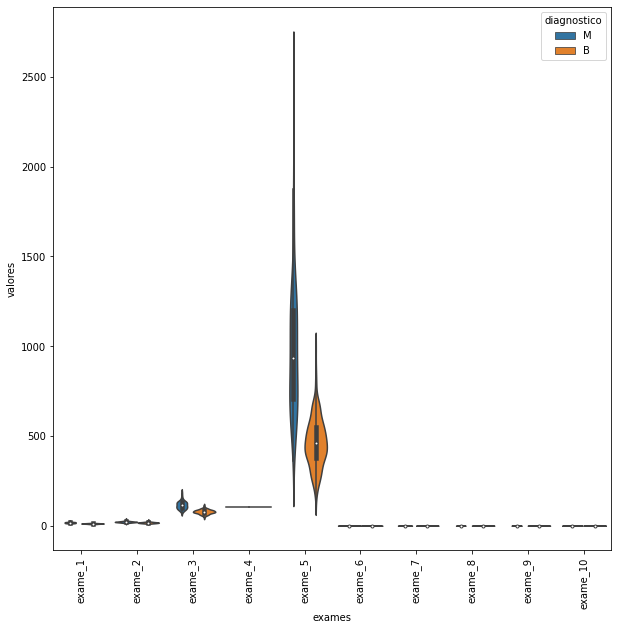

In [ ]:
def Grafico_Violino(valores_exames, inicio, fim):
  
  # Para juntar o diagnostico com os exames, por meio do pandas, como pd, concateno
  # através da função concat; o axis=1 significa que quero fazer isso gerando colunas, 
  # para diagnostico e para exames; iloc[:,0:10] Significa que estou concatenando a partir do exame 0 ao décimo.
  dados_plot = pd.concat([diagnostico, valores_exames.iloc[:,inicio:fim]], axis=1)

  # Por fim, com o objetivo de criar um dataframe, através da função melt, que significa fundir, 
  #crio-o com o diagnostico, exames e valores
  dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

  # Aumentando o tamanho da figura
  plt.figure(figsize=(10,10))

  # Melhorando a legenda
  plt.xticks(rotation = 90)

  sns.violinplot(x = "exames", y= "valores", hue="diagnostico", data=dados_plot)

Grafico_Violino(valores_exames_raw, 0, 10)


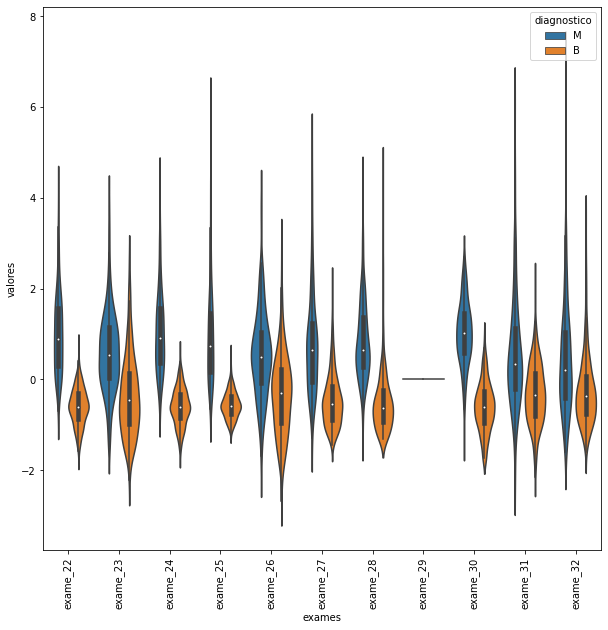

In [ ]:
# O gráfico saiu, mas com uma visualização ruim. 
# Para arrumar isso é só escalonar por meio do StandardScaler.

from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()

# Adapta o padronizador a minha feature.
padronizador.fit(valores_exames_raw)

# Transforma a feature para seguir uma proporção.
valores_exames2 = padronizador.transform(valores_exames_raw)

# Ao chamar o DataFrame por meio do pd, transformo o exame_2, que estave
# sendo um array de arrays em um dataframe, sendo que data será o valores_exame2, 
# e as colunas seguirão o paradigma da variável exames. 
valores_exames2 = pd.DataFrame(data=valores_exames2, columns= valores_exames_raw.keys())

Grafico_Violino(valores_exames2, 21,32)

#features cte's(exame_4, 29)

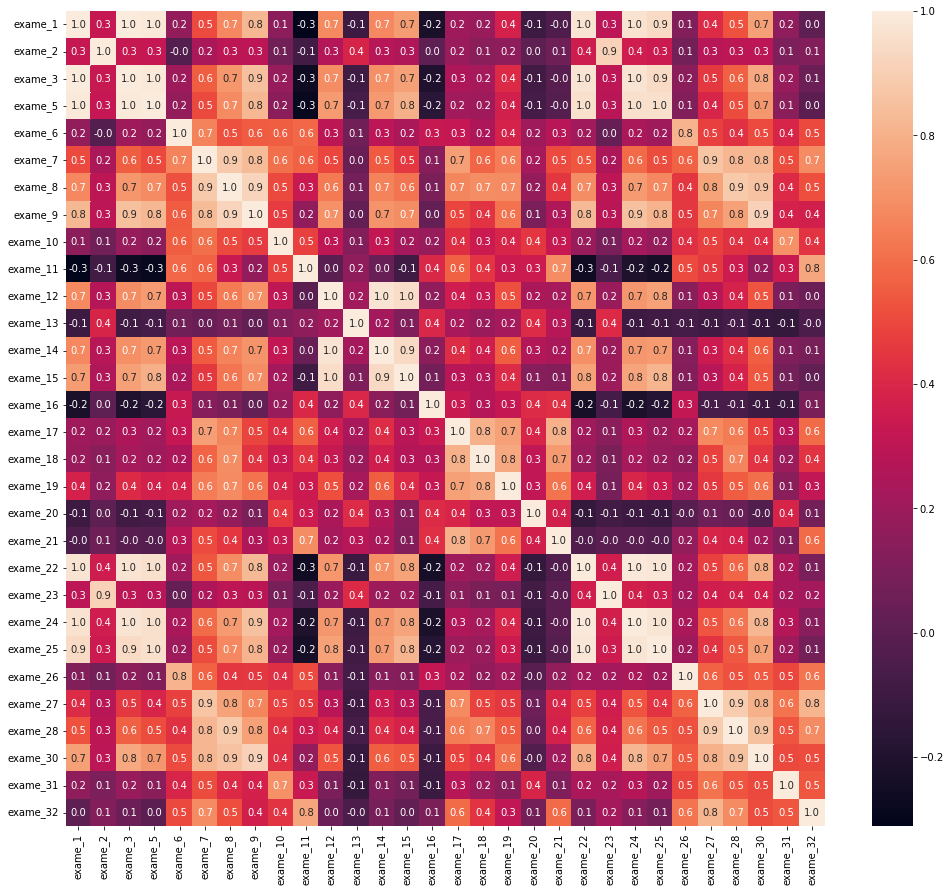

In [ ]:
# Agora já sei as features que são constantes e as altamente correlatas?
# Para saber isso precisarei da matriz de correlação, fornecida por meio 
# da funcção corr(); 

valores_exames3 = valores_exames2.drop(columns=["exame_4", "exame_29"])

# Gerando a matriz de correlação
matriz_de_correlacao = valores_exames3.corr()

# Para visualizar
plt.figure(figsize=(17,15))
# sns.heatmap faz uma matriz de calor. 
# annot = True me informa os valores da correlação
# fmt = ".1f" me retorna aos valores da correlação 
# números com uma casa decimal apenas
sns.heatmap(matriz_de_correlacao, annot=True, fmt=".1f")




In [ ]:
matriz_de_correlacao = matriz_de_correlacao[matriz_de_correlacao>0.99]
matriz_de_correlacao

# Os que retornam valores NaN significam que seus valores são < 0.99

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,0.987357,NaN,NaN,NaN,0.822529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969539,NaN,0.965137,0.941082,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,0.986507,NaN,NaN,NaN,0.850977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969476,NaN,0.970387,0.941550,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,0.987357,NaN,0.986507,1.000000,NaN,NaN,NaN,0.823269,NaN,NaN,NaN,NaN,NaN,0.800086,NaN,NaN,NaN,NaN,NaN,NaN,0.962746,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.805324,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.000000,0.883121,0.831135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.865809,0.816275,0.815573,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,0.883121,1.000000,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.884103,0.861323,NaN,NaN
exame_9,0.822529,NaN,0.850977,0.823269,NaN,0.831135,0.921391,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830318,NaN,0.855923,0.809630,NaN,NaN,NaN,0.910155,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matriz_de_correlacao.sum()

# Valores muito correlatos são:
# exame_1, 3; exame_22, 24. 
# Percebe-se que são esses, 
# pois apresentam valores > 1 e equivalentes
# Conhecendo as features que são altamente correlacionadas, 
# podemos excluí-las, pois não irão impactar negativamente
# o estimador e sua acurácia. 

exame_1     6.683499
exame_2     1.912045
exame_3     6.716752
exame_5     7.478298
exame_6     1.805324
exame_7     5.211913
exame_8     4.549937
exame_9     8.655326
exame_10    1.000000
exame_11    1.000000
exame_12    2.924624
exame_13    1.000000
exame_14    2.910449
exame_15    4.500979
exame_16    1.000000
exame_17    2.604537
exame_18    1.801268
exame_19    1.000000
exame_20    1.000000
exame_21    1.803269
exame_22    6.709802
exame_23    1.912045
exame_24    7.538174
exame_25    7.424476
exame_26    1.805324
exame_27    4.369605
exame_28    4.448073
exame_30    6.059888
exame_31    1.000000
exame_32    1.810455
dtype: float64

In [ ]:
valores_exames4 = valores_exames3.drop(columns=["exame_3", "exame_24"])
print(valores_exames4)

      exame_1   exame_2   exame_5  ...  exame_30  exame_31  exame_32
0    1.097064 -2.073335  0.984375  ...  2.296076  2.750622  1.937015
1    1.829821 -0.353632  1.908708  ...  1.087084 -0.243890  0.281190
2    1.579888  0.456187  1.558884  ...  1.955000  1.152255  0.201391
3   -0.768909  0.253732 -0.764464  ...  2.175786  6.046041  4.935010
4    1.750297 -1.151816  1.826229  ...  0.729259 -0.868353 -0.397100
..        ...       ...       ...  ...       ...       ...       ...
564  2.110995  0.721473  2.343856  ...  1.629151 -1.360158 -0.709091
565  1.704854  2.085134  1.723842  ...  0.733827 -0.531855 -0.973978
566  0.702284  2.045574  0.577953  ...  0.414069 -1.104549 -0.318409
567  1.838341  2.336457  1.735218  ...  2.289985  1.919083  2.219635
568 -1.808401  1.221792 -1.347789  ... -1.745063 -0.048138 -0.751207

[569 rows x 28 columns]


In [ ]:
# Viu que há valores negativos para alguns exames?
# Para que isso não ocorra, mas que tenha as features excluidas
# que não são úteis, basta usar o primeiro valores_exames e 
# exluir as respctivas features. 

valores_exames5 = valores_exames_raw.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

Classificador(valores_exames5)
ClassificadorDummy(valores_exames5)

A acuracia do RandomForestClassifier é 95%
A acuracia do DummyClassifier é 63%


In [ ]:
# Com menos features, a nossa acurácia ainda consegue ser maior. 
# Mas se eu quisesse reduzir significativamente a quantidade de
# features, mas sem perder a qualidade?
# Há duas formas para isso, nas quais uma selecionará as melhores
# features elevando seus valores ao quadrado e preterindo as de menor valor, 
# e outra na qual selecionará as melhores features excluindo outras. 
# Tais ferramentas são: SlectKBest (que usará o método chi2) e o RFE. 
# Com ambos iremos, antes, treinar as features e predizer o teste_x; 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames5, diagnostico, test_size=0.30, stratify=diagnostico)

selecionar_kmelhores.fit(treino_x, treino_y)

# Transformo o treino para ter apenas 5 features
treino_KBest = selecionar_kmelhores.transform(treino_x)

# Transformo o teste para ter apenas 5 features
teste_KBest = selecionar_kmelhores.transform(teste_x)

modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(treino_KBest, treino_y)
previsao = modelo.predict(teste_KBest)
acuracia = accuracy_score(teste_y, previsao)*100


modeloDummy = DummyClassifier(strategy="most_frequent")
modeloDummy.fit(treino_x, treino_y)
previsaoDummy = modeloDummy.predict(teste_x)
acuraciaDummy = accuracy_score(teste_y, previsaoDummy)*100

print("A acuracia do RandomForestClassifier é %2.f%%" %(acuracia))
print("A acuracia do DummyClassifier é %2.f%%" %(acuraciaDummy))





A acuracia do RandomForestClassifier é 89%
A acuracia do DummyClassifier é 63%


In [ ]:
# Esse foi o meu resultado usando o SelectKBest, vejamos com o RFE. 

In [ ]:
from sklearn.feature_selection import RFE

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames5, diagnostico, test_size=0.30, stratify=diagnostico)

modelo = RandomForestClassifier(n_estimators=100)
modeloDummy = DummyClassifier(strategy="most_frequent")

selecionador_rfe = RFE(estimator = modelo, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

modelo.fit(treino_rfe, treino_y)
previsao = modelo.predict(teste_rfe)
acuracia = accuracy_score(teste_y, previsao)*100

modeloDummy.fit(treino_rfe, treino_y)
previsaoDummy = modeloDummy.predict(teste_rfe)
acuraciaDummy = accuracy_score(teste_y, previsaoDummy)*100


print("A acuracia do RandomForestClassifier é %2.f%%" %(acuracia))
print("A acuracia do DummyClassifier é %2.f%%" %(acuraciaDummy))



A acuracia do RandomForestClassifier é 92%
A acuracia do DummyClassifier é 63%


[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

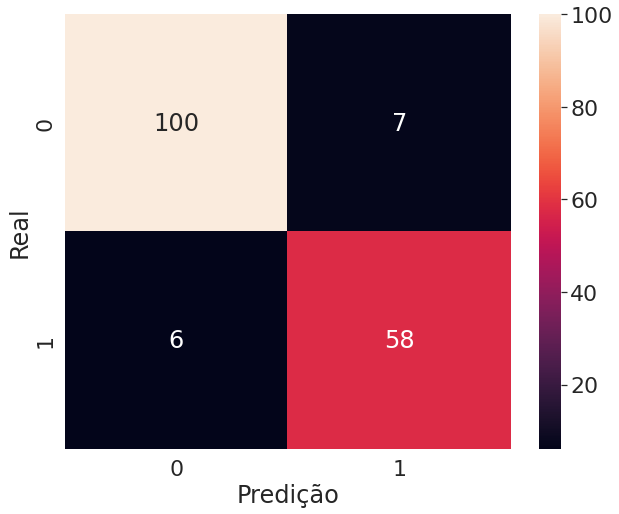

In [ ]:
from sklearn.metrics import confusion_matrix

# A matriz de confunsão é usada como forma de compreender
# como o algoritimo está acertando ou errando, podendo ser vista
# astravés de um mapa de calor, em que os valores horizontais se somam, por exemplo 100 + 7, 
# resultando em 107, e os valores 0 são para não e 1 para sim. 
# Nesse caso 0 não era maligno e 1 era maligno. 

matriz_confusao = confusion_matrix(teste_y, modelo.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")


A acuracia do RandomForestClassifier é 94%
A acuracia do DummyClassifier é 63%


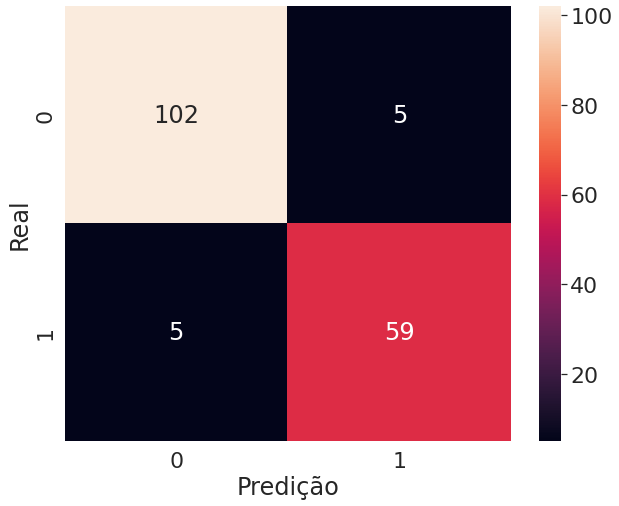

In [ ]:
from sklearn.feature_selection import RFECV

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames5, diagnostico, test_size=0.30, stratify=diagnostico)

modelo = RandomForestClassifier(n_estimators=100)
modeloDummy = DummyClassifier(strategy="most_frequent")

selecionador_rfecv = RFECV(estimator = modelo, cv = 5, scoring = "accuracy",step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

modelo.fit(treino_rfecv, treino_y)
previsao = modelo.predict(teste_rfecv)
acuracia = accuracy_score(teste_y, previsao)*100

modeloDummy.fit(treino_rfecv, treino_y)
previsaoDummy = modeloDummy.predict(teste_rfecv)
acuraciaDummy = accuracy_score(teste_y, previsaoDummy)*100

def matriz_confusao(valor_real, previsao):
  # valor real: teste_y
  # valor da previsao: modelo.predict(teste_rfecv)
  matriz_confusao = confusion_matrix(valor_real, previsao)
  plt.figure(figsize = (10, 8))
  sns.set(font_scale = 2)
  sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")


print("A acuracia do RandomForestClassifier é %2.f%%" %(acuracia))
print("A acuracia do DummyClassifier é %2.f%%" %(acuraciaDummy))

matriz_confusao(teste_y, modelo.predict(teste_rfecv))





In [ ]:
# Por meio de outro selecionador automático de features, o rfecv
# tem-se uma acurácia melhor. 
# Para ver a quantidade de features que foram necessárias:
selecionador_rfecv.n_features_


19

In [ ]:
# Para saber quais são as que foram usadas:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_7', 'exame_8', 'exame_9',
       'exame_11', 'exame_12', 'exame_14', 'exame_15', 'exame_22', 'exame_23',
       'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30', 'exame_31',
       'exame_32'],
      dtype='object')

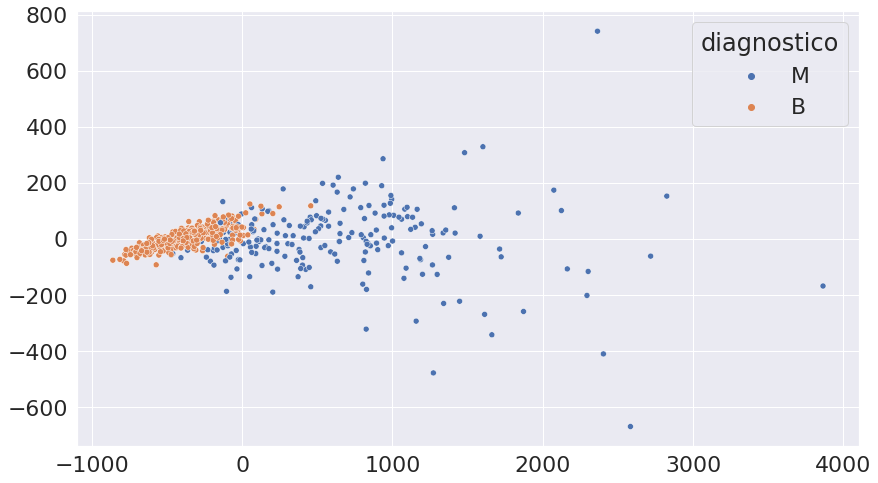

In [ ]:
from sklearn.decomposition import PCA

# A melhor maneira de transformar diversas features em apenas duas, 
# sem perder muita informação e com o objetivo de plotar num gráfico 
# de duas dimensões é por meio do PCA, o qual opera uma transformação 
# matemática sobre os dados, na qual as primeiras dimensões serão as variáveis 
# que manterão o maior volume possível de informação

# n_components =2 significa que quero duas features apenas. 
pca = PCA(n_components = 2)

# Adapto e transformo os valores_exames5; 
valores_exames6 = pca.fit_transform(valores_exames5)

plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames6[:,0], y=valores_exames6[:,1], hue=diagnostico)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


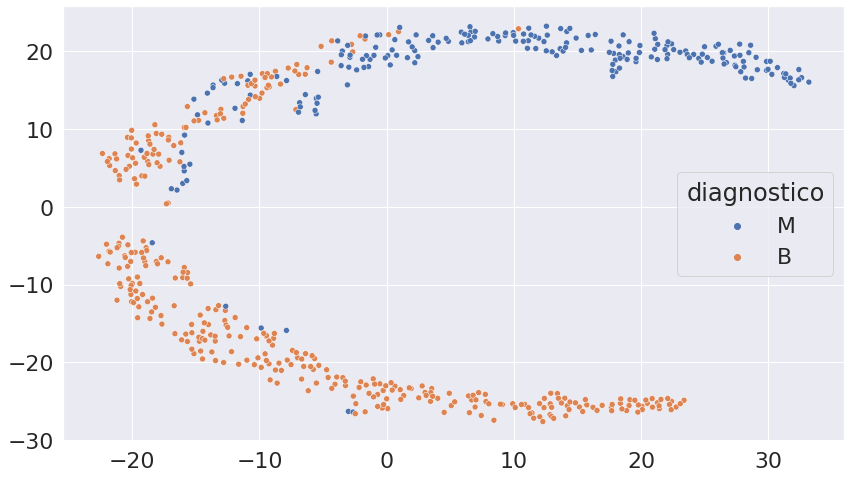

In [ ]:
from sklearn.manifold import TSNE

# n_components =2 significa que quero duas features apenas. 
tsne = TSNE(n_components = 2)

# Adapto e transformo os valores_exames5; 
valores_exames6 = tsne.fit_transform(valores_exames5)

plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames6[:,0], y=valores_exames6[:,1], hue=diagnostico)
